# Zero-Shot Cross-Lingual Transfer after Fine-Tuning

In [ ]:
from datasets import get_dataset_config_names

xtreme_subsets = get_dataset_config_names("xtreme")#xtream이라는 허깅페이스에서 제공하는 데이터셋인데 다양한 태스크중 PAN-X(WikiANN 기반 Named Entity Reocgnigion)태스크만 추출
print(f"XTREME 서브셋 개수 : {len(xtreme_subsets)}")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

XTREME 서브셋 개수 : 183


In [ ]:
panx_subsets = [s for s in xtreme_subsets if s.startswith("PAN")]
panx_subsets[:3]

['PAN-X.af', 'PAN-X.ar', 'PAN-X.bg']

In [ ]:
from datasets import load_dataset

load_dataset("xtreme",name="PAN-X.de")#독일어 데이터셋만 추출하기

PAN-X.de/train-00000-of-00001.parquet:   0%|          | 0.00/1.18M [00:00<?, ?B/s]

PAN-X.de/validation-00000-of-00001.parqu(…):   0%|          | 0.00/590k [00:00<?, ?B/s]

PAN-X.de/test-00000-of-00001.parquet:   0%|          | 0.00/588k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/20000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['tokens', 'ner_tags', 'langs'],
        num_rows: 20000
    })
    validation: Dataset({
        features: ['tokens', 'ner_tags', 'langs'],
        num_rows: 10000
    })
    test: Dataset({
        features: ['tokens', 'ner_tags', 'langs'],
        num_rows: 10000
    })
})

독일어(de),프랑스어(fr),이탈리아어(it),영어(en) 말뭉치 샘플링
그러면 언어가 불균형한 데이터셋이 만들어지는데 흔한 일이다.
소수 언어에서 레이블된 샘플을 구하려면 비용이 많이듬
불균형한 데이터셋을 이용해 다중 언어 어플리케이션을 다룰때 발생하는
일반적인 상황을 시뮬레이션하고 모든 언어에서 작동하는 모델을 만들어보자

In [ ]:
from collections import defaultdict#딕셔너리를 만들때,존재하지 않는 키를 조회하면 자동으로 기본값
from datasets import DatasetDict#Hugging face datasets 라이브러리에서 'train','test',validation 스플릿을 하나로 묶어 관리하는 객체

langs =["de","fr",'it',"en"]
fracs =[0.629,0.229,0.084,0.059]#위 언어들에 맞춰 최종 데이터셋에서 차지할 비율을 정한 리스트(일부로 데이터 불균형을 일으킴 )
                                #실험의 목적을 위해서 : 언어별 학습 데이터 크기 불균형이 모델 전이에 어떤 영향을 주는지
#키가 없는 경우 Datasetdic를 반환
panx_ch = defaultdict(DatasetDict)#최종적으로 처리할 데이터를 저장할 딕서녀리

for lang , frac in zip(langs,fracs):#zip을 활용해 langs,fracs를 짝지어 반복문
  #다국어 말뭉치를 로드한다
  ds = load_dataset("xtreme",name=f"PAN-X.{lang}")
  #각 분활을 언어 비율에 따라 다운샘플링하고 섞음
  for split in ds:
    panx_ch[lang][split]=(ds[split].shuffle(seed=0).select(range(int(frac * ds[split].num_rows))))

PAN-X.fr/train-00000-of-00001.parquet:   0%|          | 0.00/837k [00:00<?, ?B/s]

PAN-X.fr/validation-00000-of-00001.parqu(…):   0%|          | 0.00/419k [00:00<?, ?B/s]

PAN-X.fr/test-00000-of-00001.parquet:   0%|          | 0.00/423k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/20000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

PAN-X.it/train-00000-of-00001.parquet:   0%|          | 0.00/932k [00:00<?, ?B/s]

PAN-X.it/validation-00000-of-00001.parqu(…):   0%|          | 0.00/459k [00:00<?, ?B/s]

PAN-X.it/test-00000-of-00001.parquet:   0%|          | 0.00/464k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/20000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

PAN-X.en/train-00000-of-00001.parquet:   0%|          | 0.00/942k [00:00<?, ?B/s]

PAN-X.en/validation-00000-of-00001.parqu(…):   0%|          | 0.00/472k [00:00<?, ?B/s]

PAN-X.en/test-00000-of-00001.parquet:   0%|          | 0.00/472k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/20000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

In [ ]:
import pandas as pd
pd.DataFrame({lang:[panx_ch[lang]["train"].num_rows] for lang in langs},index=["Number of training examples"])

,de,fr,it,en
Number of training examples,12580,4580,1680,1180


독일어 샘플링 하나 꺼내서 딕셔너리 형태 확인하는 로직

In [ ]:
element = panx_ch["de"]["train"][0]#독일어 샘플에서 첫번째 샘플하나 꺼냄
for key,value in element.items():#딕셔너리에서 키랑 값을 쌍으로 조회
  print(f"{key}: {value}")

tokens: ['2.000', 'Einwohnern', 'an', 'der', 'Danziger', 'Bucht', 'in', 'der', 'polnischen', 'Woiwodschaft', 'Pommern', '.']
ner_tags: [0, 0, 0, 0, 5, 6, 0, 0, 5, 5, 6, 0]
langs: ['de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de']


In [ ]:
for key,value in panx_ch["de"]["train"].features.items():#ner_tags를 보면 지금 숫자로 되어있는데 features를 써가지고 보기 좋게 바꿀수 있다.
  print(f"{key} : {value}")

tokens : List(Value('string'))
ner_tags : List(ClassLabel(names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC']))
langs : List(Value('string'))


숫자로 된 tag들을 문자로 바꿔주는 로직

In [ ]:
tags = panx_ch["de"]["train"].features["ner_tags"].feature#ner_tags의 필드의 정보를 문자로 시각화 하는 과정 .featuer을 이용해
print(tags)


def create_tag_names(batch):#batch는 데이터셋의 한 샘플
  return {"ner_tags_str" : [tags.int2str(idx) for idx in batch["ner_tags"]]}#tags.int2str은 허깅패이스 내장 메서드 숫자를 문자로 바꿔줌 리스트 컴프리핸션 메서드를 사용한거임
                                                                            #새로운 키 ner_tags_str을 만들어서 반환

panx_de = panx_ch["de"].map(create_tag_names)#map은 Huggingface DatasetDict와 Dataset의 핵심 메서드
                                            #모든 샘플에 대해 함수를 적용해서 새로운 필드나 변환을 추가
                                            #여기서는 위에서 만든 create_tag_names메서드를 사용해서 새로운 ner_tags_str이라는 새로운 필드를 추가

ClassLabel(names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC'])


Map:   0%|          | 0/12580 [00:00<?, ? examples/s]

Map:   0%|          | 0/6290 [00:00<?, ? examples/s]

Map:   0%|          | 0/6290 [00:00<?, ? examples/s]

In [ ]:
de_example = panx_de["train"][0]#독일어 데이터 샘플 첫번째 데이터를 가져옴
pd.DataFrame([de_example["tokens"],de_example["ner_tags_str"]],['Tokens','Tags'])#de_exaple["tokens"]단어 목록 ner_tags_str은 위에서 정의한 새로운 필드 행에 인덱스를 쓰는 부분은 Tokens,Tags
                                                                                #DataFrame의 문법 예시는 DataFrame(data,index)

,0,1,2,3,4,5,6,7,8,9,10,11
Tokens,2.000,Einwohnern,an,der,Danziger,Bucht,in,der,polnischen,Woiwodschaft,Pommern,.
Tags,O,O,O,O,B-LOC,I-LOC,O,O,B-LOC,B-LOC,I-LOC,O


태그가 불균형하게 부여되지 않았나 확인하기 위해 Couter로 비교할 할수 있다.

In [ ]:
from collections import Counter#Counter은 파이썬의 표준 라이브러리로 항목의 수를 세는 라이브러임

split2freqs = defaultdict(Counter)#split2freqs에 새로운 key가 들어오면 기본값으로 빈 Counter() 객체를 자동으로 생성해라
for split , dataset in panx_de.items():
  for row in dataset["ner_tags_str"]:
    for tag in row:
      if tag.startswith("B"):#만약에 문자열의 시작이 B로 시작하면 B로 시작하는 Tag만 샌다는거임
        tag_type = tag.split("-")[1]#B-PER 같은 것을 B,PER로 -기준으로 분리함 인덱스 1번을 꺼내면 PER 엔티티만 꺼내옴 ["B","PER"] 1번만 꺼내온다는거임 -기준으로 나누고
        split2freqs[split][tag_type] +=1#split2freqs는 count객체임 그안에서 해당 엔티티("PER","ORG","LOC")의 개수를 채크함
                                        #split에는 train,validation,test가 있고 tag_type에는 -로 분활해서 PER,ORG,LOC만 뽑은 객체가 있음 몇개가 있는지 Count객체를 사용해서 활용함

pd.DataFrame.from_dict(split2freqs,orient ="index") #딕셔너리를 판다스 데이터프레임으로 바꾸는 로직 pands에서 제공하는 pd.DataFrame.from_dict를 사용해서 딕셔너리 형태를 데이터프레임 형태로 변환함


,LOC,ORG,PER
train,6186,5366,5810
validation,3172,2683,2893
test,3180,2573,3071


In [ ]:
  import torch.nn as nn
  from transformers import XLMRobertaConfig#모델설정(히든 레이블,사이즈,레이블수등)을 저장하는 라이브러리
  from transformers.modeling_outputs import TokenClassifierOutput#HF 표준 출력 객체, loss,logits,hidden_state,attentions 필드를 가짐
  from transformers.models.roberta.modeling_roberta import RobertaModel#Robert이 인코더 본채
  from transformers.models.roberta.modeling_roberta import RobertaPreTrainedModel#가중치 초기화 ,from_pretrained 로딩 등
#Robert이 인코더 본채

  class XLMRobertaForTokenClassification(RobertaPreTrainedModel):
    config_class = XLMRobertaConfig
    def __init__(self,config):

      super().__init__(config)#config를 활용해서 저장
      self.num_labels  = config.num_labels#label
      #모델 바디를 로드합니다
      self.roberta = RobertaModel(config,add_pooling_layer =False)
      #토큰 분류 헤드를 준비합니다
      self.dropout = nn.Dropout(config.hidden_dropout_prob)
      self.classifier = nn.Linear(config.hidden_size,config.num_labels)
      #가중치를 로드하고 초기화한다
      self.init_weights()

    def forward(self,input_ids = None,attention_mask =None,token_type_ids =None,labels=None, **kwargs):
      #모델 바디를 사용해 인코더 표현 얻음
      outputs = self.roberta(input_ids,attention_mask=attention_mask,token_type_ids=token_type_ids)
      #인코더 표현을 헤드에 통과시킵니다
      sequence_output = self.dropout(outputs[0])
      logits = self.classifier(sequence_output)
      #손실을 계산합니다.
      loss = None
      if labels is not None:
        loss_fct = nn.CrossEntropyLoss()
        loss = loss_fct(logits.view(-1,self.num_labels),labels.view(-1))
      #모델 출력 객체를 반환합니다
      return TokenClassifierOutput(loss= loss , logits = logits,hidden_states = outputs.hidden_states,attentions= outputs.attentions)

In [ ]:
index2tag = {idx:tag for idx,tag in enumerate(tags.names)}
tag2index = {tag:idx for idx,tag in enumerate(tags.names)}

In [ ]:
from transformers import AutoConfig

xlmr_model_name = "xlm-roberta-base"
xlmr_config = AutoConfig.from_pretrained(xlmr_model_name,num_labels = tags.num_classes,id2label = index2tag,label2id = tag2index)

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

In [ ]:
from transformers import AutoTokenizer
xlmr_tokenizer = AutoTokenizer.from_pretrained(xlmr_model_name)

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

In [ ]:
text = "JackSparrow loves NewYork!"

In [ ]:
input_ids = xlmr_tokenizer.encode(text,return_tensors="pt")#tokenizer.encode는 문자 -> 숫자로 변환해줍니다
tokens = xlmr_tokenizer.convert_ids_to_tokens(input_ids[0])#반대로 변환한 문자 -> 숫자를 사용자가 보기 좋게 숫자->문자로 한번더 바꿔줌
pd.DataFrame([tokens,input_ids[0].numpy()],index=["Tokens","Input IDs"])

,0,1,2,3,4,5,6,7,8,9
Tokens,<s>,▁Jack,Sp,arrow,▁love,s,▁New,York,!,</s>
Input IDs,0,21763,31923,118201,5161,7,2356,185302,38,2


In [ ]:
xlmr_model =XLMRobertaForTokenClassification(xlmr_config)

In [ ]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
xlmr_model.to(device)
input_ids = input_ids.to(device)


#입력토큰을 모델에 통과시켜서 logits(예측점수)를 얻고
#그중에서 가장 확률이 높은 태그 인덱스를 선택하는 과정


outputs =  xlmr_model(input_ids).logits#정답을 주지 않았기 때문에 loss는 계산안함 --> loss를 제외한 최종 예측 점수 =logits  만 빼네어 output에  대입
                                        #logits = 모델 출력 객체
                                        #logits 안에는 각 토큰별로 태그별 점수가 들어있음

predictions= torch.argmax(outputs,dim=-1)#라벨 차원에서 가장 큰값 추출
                                        #torch.armax(tensor,dim=차원)
                                        #prediction.shape = [batch_size,num_tokens]
                                        #dim=-1로 해서 numtokens만 추출함
print(f"시퀀스에 있는 토큰의 수 :{len(tokens)}")
print(f"출력 크기 : {outputs.shape}")


#logits의 크기는 [batch_size,num_tokens,num_tags]
#사전훈련된 모델의 예측 결과를 태그 이름으로 바꿔 토큰과 함께 출력해봄

시퀀스에 있는 토큰의 수 :10
출력 크기 : torch.Size([1, 10, 7])


In [ ]:
preds = [tags.names[p] for p in predictions[0].cpu().numpy()] #prediction에서 0번째 텐서를 꺼내서 numpy를 순회할라면 GPU- > CPU로 변환해줘야함 그걸 p에저장
                                                              #숫자로 저장되어 있는 p를 이름으로 바꾸는 로직임
                                                              #names는 속성임
pd.DataFrame([tokens,preds],index =["Tokens","Tags"]) # DataFram([이중리스트를 사용함])

,0,1,2,3,4,5,6,7,8,9
Tokens,<s>,▁Jack,Sp,arrow,▁love,s,▁New,York,!,</s>
Tags,I-LOC,O,B-LOC,B-ORG,B-ORG,O,I-LOC,I-LOC,I-ORG,B-ORG


예상대로 랜덤한 가중치를 가진 토큰 분류 층은 개선할 여지가 많음
레이블링된 데이터로 미세튜닝해서 더 좋은 결과로 만듬

In [ ]:
#이 함수로 단일 문장 예측 확인까지 봤음
def tag_text(text, tags, model, tokenizer):
  #토큰을 준비함
  tokens = tokenizer(text).tokens()
  #시퀀스를 입력 ID로 인코딩합니다
  input_ids = tokenizer(text, return_tensors="pt").input_ids.to(device)
  #가능한 일곱 개의 클래스에 대한 로짓을 출력합니다
  outputs = model(input_ids).logits
  #argmax 함수로 토큰마다 가장 가능성이 높은 클래스를 선택합니다
  predictions = torch.argmax(outputs, dim=2)#7개의 태그중 가장 큰값을 가져올라고 dim=2를 선택 지금 모양이 outputs = torch.tensor(3차원임) shape = 1,3,3
                                            #그래서 argmax(outputs에서 2차원 기준으로 가장큰값을 가져오라는뜻임)
  '''
  outputs = torch.tensor([
  [ [0.1, 0.8, 0.1],    # token1
    [0.2, 0.1, 0.7],    # token2
    [0.9, 0.05, 0.05] ] # token3
])
'''

'''
torch.argmax(outputs, dim=2)
'''

'''
출력 결과
tensor([[1, 2, 0]])
'''
  #데이터프레임으로 변환합니다.
  preds = [tags.names[p] for p in predictions[0].cpu().numpy()]
  return pd.DataFrame([tokens, preds], index=["Tokens", "Tags"])

NER 작업을 위해 텍스트 토큰화하기

하나의 샘플을 인코딩하고 처리하는 토크나이저와 모델을 준비했으므로 다음 단계느 미세튜닝을 위해 XLM-R 모델에 전달할 전체 데이터셋을 토큰화하는 것입니다.


In [ ]:
words,labels = de_example["tokens"],de_example["ner_tags"]

그다음 각 단어를 토큰화 합니다.토크나이저에 is_split_into_words 매개변수를 사용해 입력 문장이 이미 단어로 나눠졌다는 사실을 전달

In [ ]:
tokenized_input = xlmr_tokenizer(de_example["tokens"],is_split_into_words = True)
tokens = xlmr_tokenizer.convert_ids_to_tokens(tokenized_input["input_ids"])
pd.DataFrame([tokens],index=["Tokens"])

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Tokens,<s>,▁2.000,▁Einwohner,n,▁an,▁der,▁Dan,zi,ger,▁Buch,...,▁Wo,i,wod,schaft,▁Po,mmer,n,▁,.,</s>


이 예에서 토크나이저에서 Einwohnern을 두개의 부분단어 _Einwohner 과 n으로 나눠짐

_Einwohner 만 B-Loc 레이블에 연결한다는 규칙을 따라야 하므로 첫 번째 부분단어 이후의 부분단어는 마스킹합니다. tokenized_input 객체에는 이 작업에 도움되는
word_ids()메서드가 있음

In [ ]:
#word_ids() 메서드는 각 서브워드 토큰이 속한 원 단어의 인덱스를 리턴함
#NER라벨은 단어 단위이지만, 모델 입력은 서브워드 단위임
#각 단어의 첫 서브워드에만 원래 라벨 부여 (B-,/-등)
#같은 단어의 나미저 서브워드는 무시 라벨 -100으로 마스킹
#이때 ids_word()메서드가 필수.첫/후속 서브워드 판별을 이 인덱스로 함
word_ids = tokenized_input.word_ids()
pd.DataFrame([tokens,word_ids],index =['Tokens',"Words IDs"])

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Tokens,<s>,▁2.000,▁Einwohner,n,▁an,▁der,▁Dan,zi,ger,▁Buch,...,▁Wo,i,wod,schaft,▁Po,mmer,n,▁,.,</s>
Words IDs,None,0,1,1,2,3,4,4,4,5,...,9,9,9,9,10,10,10,11,11,None


부분단어 표현을 마스킹하기 위해 ID를 -100으로 선택한 이유
파이토치에 있는 크로스엔트로피 손실 클래스의 ignore_index 속성값이 -100이기 때문이다.훈련하는동안 이 인덱스는  무시함

In [ ]:
previous_word_idx =None
label_ids = []

for word_idx in word_ids:
  #첫번째 서브월드만 인식하고 그다음 서브워드는 -100으로 바꾸는 로직을 위해 조건문 활용
  if word_idx is None or word_idx == previous_word_idx:
    label_ids.append(-100)
  #if가 아니면 첫번째 원단어 서브워드 이므로 label_ids에 리스트에 추가
  elif word_idx != previous_word_idx:
    label_ids.append(labels[word_idx])
  previous_word_idx = word_idx#현재 단어를 이전 단어라고로 기억시켜서 계속 루프 진행


labels = [index2tag[l] if l != -100 else "IGN" for l in label_ids]
#리스트컴프리헨션 로직 [ <반환값1> if <조건> else <반환값2> for <변수> in <리스트> ]
#1.label_ids에 있는 값들중에서 -100이 없으면 index2tag값에 값을 넣고 만약에 -100이 있으면 "IGN을" 값으로 넣음
index = ["Tokens","Word IDs","Label IDs","Labels"]


pd.DataFrame([tokens,word_ids,label_ids,labels],index=index)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Tokens,<s>,▁2.000,▁Einwohner,n,▁an,▁der,▁Dan,zi,ger,▁Buch,...,▁Wo,i,wod,schaft,▁Po,mmer,n,▁,.,</s>
Word IDs,None,0,1,1,2,3,4,4,4,5,...,9,9,9,9,10,10,10,11,11,None
Label IDs,-100,0,0,-100,0,0,5,-100,-100,6,...,5,-100,-100,-100,6,-100,-100,0,-100,-100
Labels,IGN,O,O,IGN,O,O,B-LOC,IGN,IGN,I-LOC,...,B-LOC,IGN,IGN,IGN,I-LOC,IGN,IGN,O,IGN,IGN


이제 위에 로직을 감싼 함수를 하나 정의해서 전체 데이터셋에 적용하겠다

In [ ]:
def tokenize_and_align_labels(examples):
    tokenized_inputs = xlmr_tokenizer(examples["tokens"], truncation=True, is_split_into_words=True)

    labels = []
    for idx, label in enumerate(examples["ner_tags"]):
        word_ids = tokenized_inputs.word_ids(batch_index=idx)
        previous_word_ids = None
        label_ids = []
        for word_idx in word_ids:
            if word_idx is None or word_idx == previous_word_ids:
                label_ids.append(-100)
            elif word_idx != previous_word_ids:
                label_ids.append(label[word_idx])
            previous_word_ids = word_idx
        labels.append(label_ids)
    tokenized_inputs["labels"] = labels
    return tokenized_inputs

각 분활을 인코딩하는데 필요한 모든 요소를 준비했으니 분할에 대해 반복 수행할 함수를 만들어봄

이 함수를 DatasetDict 객체 적용하면 분할마다 인코딩된
Dataset 객체를 얻음 이 함수를 사용해서 독일어 말뭉치를
인코딩함

In [ ]:
def encode_panx_dataset(corpus):
  return corpus.map(tokenize_and_align_labels,batched=True,remove_columns=["langs","ner_tags","tokens"])

  #Huggingface datasets 라이브러리의 가장 중요한 함수
  #map은 병렬로 데이터를 처리하는데 매우 좋은 함수이고
  #즉 데이터셋의 각 샘플에 대해 지정한 (tokenize_and_align)를 실행하고 그 결과룰 새로운 데이터셋으로 반환
  #remove_colums는 map실행후,원래 있던 열 중에서 불필요한 컬럼을 삭제해 새 데이터셋을 유지

  '''
  # batched=False 일 때
examples = {
  "tokens": ["New", "York", "City"],
  "ner_tags": [1, 2, 0]
}

# batched=True 일 때
examples = {
  "tokens": [
    ["New", "York", "City"],
    ["Berlin", "is", "great"]
  ],
  "ner_tags": [
    [1, 2, 0],
    [1, 0, 0]
  ]
}
'''



In [ ]:
panx_de_encoded = encode_panx_dataset(panx_ch["de"])

Map:   0%|          | 0/12580 [00:00<?, ? examples/s]

Map:   0%|          | 0/6290 [00:00<?, ? examples/s]

Map:   0%|          | 0/6290 [00:00<?, ? examples/s]

# 성능 측정
NER 모델 평가는 텍스트 분류 모델 평가와 비슷합니다.
일반적으로도 정밀도,재현율,f1 점수의 결과를 보고함

In [ ]:
!pip install seqeval

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16162 sha256=d6e4fef9abda906d89e47ab897401a172a3f8577d2cd1497d7defd8406e370f7
  Stored in directory: /root/.cache/pip/wheels/5f/b8/73/0b2c1a76b701a677653dd79ece07cfabd7457989dbfbdcd8d7
Successfully built seqeval


seqeval이란 토큰 단위 라벨링 평가 전용 패키지임
(NER,POS tagging,Chunking 등에서 자주 사용함)

B-xxx : 어떤 객체의 시작
I-xxx : 그 개체의 나머지 부분
O : 개체가 아닌 단어

MISC란 기타의 약자임 : 사람,장소,조직 그 외의 고유 명사들임

In [ ]:
from seqeval.metrics import classification_report

#이코드는 classification_report가 어떻게 평가되는지 가상으로 테스트해봄
y_true = [["O","O","O","B-MISC","I-MISC","I-MISC","O"],["B-PER","I-PER","O"]]# [문장1],[문장2]
y_pred = [["O","O","B-MISC","I-MISC","I-MISC","I-MISC","O"],["B-PER","I-PER","O"]]#[문장1예측],[문장2예측]

print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

        MISC       0.00      0.00      0.00         1
         PER       1.00      1.00      1.00         1

   micro avg       0.50      0.50      0.50         2
   macro avg       0.50      0.50      0.50         2
weighted avg       0.50      0.50      0.50         2



이렇게 seqeval은 리스트의 리스트로 구성된 예측과 레이블을 입력받습니다. 각 리스트는 검증 세트나 테스트 세트의 한 샘플에 해당합니다.이런 지표를 훈련 과정에 통합하려면 모델 출력을 seqeval이 기대하는 리스트로 변환하는 함수가 필요하다

In [ ]:
#이 함수align_predictions() 는 NER 모델의 예측 결과 와 정답을 사람이 보기 좋게 좋은 형태로 정렬 및 변환하는 코드

import numpy as np
def align_predictions(predictions,label_ids):
  preds = np.argmax(predictions,axis=2)
  batch_size ,seq_len = preds.shape
  labels_list,preds_list = [],[]

  for batch_idx in range(batch_size):
    example_labels,example_preds = [],[]
    for seq_idx in range(seq_len):
      #레이블 Ids = -100무시
      if label_ids[batch_idx,seq_idx] != -100:
        example_labels.append(index2tag[label_ids[batch_idx][seq_idx]])#"문장 batch_idx의 seq_idx번째 토큰이 어떤 태그인지 문자열로 변환"하는 코드야 0: B-PER
        example_preds.append(index2tag[preds[batch_idx][seq_idx]])

    labels_list.append(example_labels)
    preds_list.append(example_preds)

  return preds_list,labels_list

# XLM-RoBERTa Fine-Tunning

이제 모델을 미세 튜닝할 모든 요소를 갖춤
첫번째 전략은 PAN-X의 독일어 서브셋에
베이스 모델을 미세튜닝하고 프랑스어,이탈리아어,영어에서
제로샷 교차 언어 성능을 평가하는것임
허깅페이스 트렌스포머 Trainer를 사용해 훈련 루프를 처리함

여기서는 에포크가 끌날 때마다 검증 세트에 대한 모델의 예측을 평가함. 가중치 감쇠값을 조정하고 체크포인트를 저장하지 않도록 save_steps를 큰수로 설정해 훈련속도를 높인다.

In [ ]:
from transformers import TrainingArguments

num_epochs = 3
batch_size =16
logging_steps = len(panx_de_encoded["train"])//batch_size #한 에포크에 한 번 정도로 로그를 찍게끔 설정
model_name =f"{xlmr_model_name}-finetuned-panx-de"
training_args = TrainingArguments(
    output_dir = model_name, log_level = "error",num_train_epochs=num_epochs,
    per_device_train_batch_size =batch_size,
    per_device_eval_batch_size = batch_size,eval_strategy = "epoch",#evaluation_strategy='epoch': 각 에포크 종료 시 검증셋으로 성능 측정.
    save_steps = 1e6,weight_decay =0.05,disable_tqdm =False,
    logging_steps = logging_steps,push_to_hub=True,
    report_to = "none")

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

검증세트에서 평가 지표를 어떻게 계산해야 하는지 Trainer로 전달해야합니다.
따라서 앞서 정의한 align_predictions() 함수를 사용해 seqeval이 기대하는 형식에 맞춰 예측과 레이블을 추출해 f1 점수를 계산

In [ ]:
from seqeval.metrics import f1_score

def compute_metrics(eval_pred):
  y_pred,y_true = align_predictions(eval_pred.predictions,eval_pred.label_ids)

  return {"f1" : f1_score(y_true,y_pred)}


마지막으로 배치에서 가장 큰 시퀀스 길이로 입력 시퀀스를 패딩하도록 데이터 콜레이터를 정의함. 허깅페이스 트랜스포머스는 토큰 분류를 위해 입력과 레이블을 패딩하는 전용 데이터 콜레이터를 제공함

In [ ]:
from transformers import DataCollatorForTokenClassification# 이 라이브러리를 BERT,RoBERTa,GPT 등 다양한 사전학습 언어모델을 쉽게 불러오고 학습할수 있게하

data_collator = DataCollatorForTokenClassification(xlmr_tokenizer)#XLM-R 모델에 맞는 토크나이저를 사용해서,NER같은 토큰 분류 과제용 데이터묶음 객체를 만듬

#왜 필요하냐
#문장의 길이가 서로 다 다름 이 문자들을 한 배치로 묶을라면 길이를 맞춰줘야 GPU가 병렬 연산을 할수 있음
#그래서 DataCollatorForTokenClassification이 짧은 문장을 PAD 토큰으로 채워줌 라벨도 같이 함께 생성

#왜 그냥 DataCollatorWithPadding이 아니라 ForTokenClassification인가?
#일반 DataCollatorWithPadding은 입력 토큰만 패딩함
#하지만 NER에서는 라밸 배열도 같이 패딩해야한다.

Trainer를 위해 매번 새로운 모델을 만들지 않도록 model_init()함수를 만듬

In [ ]:
#Trainer는 내부적으로 여러 번 모델을 불러 올수 있음.그래서 모델을 함수 형태로 넘기면,Trainer가 필요할때마다 새로 초기화 가능
'''
from_pretrained()은 사전학습된 XLM-R 기반 가중치를 불러오고,
config에는 라벨 수, hidden size, dropout 비율 등이 들어 있습니다.
'''
def model_init():
  return(XLMRobertaForTokenClassification.from_pretrained(xlmr_model_name,config= xlmr_config).to(device))

In [ ]:
from transformers import Trainer

trainer =Trainer(model_init =model_init,args =training_args,data_collator =data_collator,compute_metrics =compute_metrics,train_dataset =panx_de_encoded["train"],eval_dataset =panx_de_encoded["validation"],tokenizer =xlmr_tokenizer)

/tmp/ipython-input-4289957748.py:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer =Trainer(model_init =model_init,args =training_args,data_collator =data_collator,compute_metrics =compute_metrics,train_dataset =panx_de_encoded["train"],eval_dataset =panx_de_encoded["validation"],tokenizer =xlmr_tokenizer)


In [ ]:
trainer.train()
trainer.push_to_hub(commit_message="Training completed")

Epoch,Training Loss,Validation Loss,F1
1,0.260600,0.163566,0.819654
2,0.136000,0.148836,0.839057
3,0.088500,0.134728,0.857997
4,0.057400,0.157204,0.862317
5,0.036600,0.167457,0.873438


Processing Files (0 / 0)      : |          |  0.00B /  0.00B            

New Data Upload               : |          |  0.00B /  0.00B            

  ...panx-de/training_args.bin: 100%|##########| 5.84kB / 5.84kB            

  ...e/sentencepiece.bpe.model: 100%|##########| 5.07MB / 5.07MB            

  ...panx-de/model.safetensors:   2%|1         | 16.7MB / 1.11GB            

  ...ed-panx-de/tokenizer.json:  98%|#########7| 16.7MB / 17.1MB            

CommitInfo(commit_url='https://huggingface.co/cuteddong/xlm-roberta-base-finetuned-panx-de/commit/654c4a87d3daf9d09e500f3928412d0fc23ff0db', commit_message='Training completed', commit_description='', oid='654c4a87d3daf9d09e500f3928412d0fc23ff0db', pr_url=None, repo_url=RepoUrl('https://huggingface.co/cuteddong/xlm-roberta-base-finetuned-panx-de', endpoint='https://huggingface.co', repo_type='model', repo_id='cuteddong/xlm-roberta-base-finetuned-panx-de'), pr_revision=None, pr_num=None)

NER 모델에서 이정도 f1 점수면 매우 좋은편임
기대한 대로 모델이 작동하는지 확인하기 위해 예시 문장을 독일어로 번역을 해봄

In [ ]:
text_de = "Jeff Dean ist ein Information bei Google in Kalifornien"
tag_text(text_de, tags, trainer.model, xlmr_tokenizer)
#getlogin(void)함수는 /var/run/utmp 파일을 검색해 현재 프로세스를 실행한 사용자의 로그인명을 찾아 리턴한다.
#만약에 이프로세르를 로ㅡ그아웃했거나 rsh 원격에서 실행한 프로세스에서 getlogin() 함수를 호출하면 사용자명을 찾지 못하고 NULL을 리터함

,0,1,2,3,4,5,6,7,8,9,10,11,12
Tokens,<s>,▁Jeff,▁De,an,▁ist,▁ein,▁Information,▁bei,▁Google,▁in,▁Kaliforni,en,</s>
Tags,O,B-PER,I-PER,I-PER,O,O,O,O,B-ORG,O,B-LOC,I-LOC,O


# 오류 분석
모델의 오류의 철저한 분석은 트랜스포머를 훈련하고 디버깅할 때 중요하다.
모델이 잘 작동하는 것처럼 보이지만,심각한 결함이 있는 몇가지 유형이 있다.

1.우연히 많은 토큰을 마스킹하고 일부 레이블도 마스킹하여 제대로 훈련되는 것처럼 손실이 감소함
2.compute_metrics() 함수에 실제 성능을 과대평가하는 버그가 있음
3.NER에 0클래스 또는 0개체명이 일반 클래스처럼 포함될 때가 있음.

In [ ]:
#검증세트에 적용할 함수
from torch.nn.functional import cross_entropy

def forward_pass_with_label(batch):
  #리스트의 딕셔너리를 데이터 콜레이터에 적합한 딕셔너리의 리스트로 반환
  features = [dict(zip(batch,t)) for t in zip(*batch.values())]
  #입력과 레이블을 패딩하고 모든 텐서를 장치에 배치
  batch =data_collator(features)
  input_ids = batch["input_ids"].to(device)
  attention_mask = batch["attention_mask"].to(device)
  labels =batch["labels"].to(device)
  with torch.no_grad():
    #데이터를 모델에 전달합니다.
    output = trainer.model(input_ids,attention_mask)
    #logit.size :[batch_size,sequence_length,classes]
    #마지막 축을 따라 가장 큰 로짓 값을 가진 클래스를 선택
    predicted_label = torch.argmax(output.logits,axis=-1).cpu().numpy()
  #배치차원을 펼친 다음 토큰마다 손실을 계산
  loss = cross_entropy(output.logits.view(-1,7),labels.view(-1),reduction ="none")
  #배치차원을 다시 만들고 넘파이 배열로 변환함
  loss = loss.view(len(input_ids),-1).cpu().numpy()

  return {"loss" :loss,"predicted_label" : predicted_label}

  #getuid(),geteuid()
  #getuid()는 실제 사용자의 id를 리턴함 : 실제 사용자란 프로그램을 실행하고, 로그인 할때 사용한 로그인명에 대응하는 UID
  #geteuid()는 유효 사용자의 id를 리턴함 : 유효 사용자 아이디란 프로세스에 대한 접근 권한을 부여하는 역할

In [ ]:
#위에 forward_pass_with_label함수를 map()메서드를 사용해 전체 검증 세트에 적용하고 추가 분석을 위해 전체 데이터를 판다스 DataFrame으로 로드
valid_set = panx_de_encoded["validation"]
valid_set = valid_set.map(forward_pass_with_label,batched=True,batch_size=32)
df = valid_set.to_pandas()

Map:   0%|          | 0/6290 [00:00<?, ? examples/s]

토큰과 레이블이 여전히 ID로 인코딩됐으니 결과를 알아보기 쉽게 토큰과 레이블을 다시 문자열로 변환함

나중에 필터링에 사용하기 위해 -100인 패딩 토큰은 특별한 레이블인 IGN으로 할당하겠음.loss와predicted_lable을 입력과 같은 길이로 잘라서 패딩을 모두제거

In [ ]:
index2tag[-100] = "IGN"
df["input_tokens"]= df["input_ids"].apply(lambda x: xlmr_tokenizer.convert_ids_to_tokens(x))

df["predicted_label"] = df["predicted_label"].apply(lambda x: [index2tag[l] for l in x])
df["labels"] = df["labels"].apply(lambda x: [index2tag[l] for l in x])
df["loss"] = df.apply(lambda x : x["loss"][:len(x['input_ids'])],axis = 1)
df["predicted_label"] = df.apply(lambda x: x["predicted_label"][:len(x["input_ids"])],axis =1)
df.head(1)

#열마다 각 샘플의 토큰,레이블,예측 레이블등의 리스트가 담겼습니다.
#이 리스트들을 펼쳐서 개별적으로 토큰을 살펴보겠다
#pandas.Series.explode()함수를 사용하면 한 줄 코드로 리스트에 있는 각원소를 하나의 행으로 만듬
#한행에 있는 리스트 길이가 모두 같으므로 모든 열에 동시에 적용
#또 iGN으로 표시된 패딩 토큰이 손실이 0이므로 이를 제외함







,input_ids,attention_mask,labels,loss,predicted_label,input_tokens
0,"[0, 10699, 11, 15, 16104, 1388, 2]","[1, 1, 1, 1, 1, 1, 1]","[IGN, B-ORG, IGN, I-ORG, I-ORG, I-ORG, IGN]","[0.0, 0.0013231818, 0.0, 0.0017738098, 0.00149...","[I-ORG, B-ORG, I-ORG, I-ORG, I-ORG, I-ORG, I-ORG]","[<s>, ▁Ham, a, ▁(, ▁Unternehmen, ▁), </s>]"


위

In [ ]:
df_tokens = df.apply(pd.Series.explode)
df_tokens = df_tokens.query("labels != 'IGN ' ")
df_tokens["loss"]= df_tokens["loss"].astype(float).round(2)
df_tokens.head(20)

#tzset()함수는 현재 지역시간대로 설정한다. 이 함수를 설정하면 전역 변수에 정보가 설정 되어 있다.
#전역변수의 종류
#tzname : 지역시간대 정보와 보정된 시간대명을 약어로 저장한다
#timezone : UTC와 지역 시간대와의 시차를 초 단위로 저장한다.
#daylight : 서머타임제를 시행하면 0이 아니고,그렇지 않으면 0이다.

,input_ids,attention_mask,labels,loss,predicted_label,input_tokens
0,0,1,IGN,0.00,I-ORG,<s>
0,10699,1,B-ORG,0.00,B-ORG,▁Ham
0,11,1,IGN,0.00,I-ORG,a
0,15,1,I-ORG,0.00,I-ORG,▁(
0,16104,1,I-ORG,0.00,I-ORG,▁Unternehmen
0,1388,1,I-ORG,0.00,I-ORG,▁)
0,2,1,IGN,0.00,I-ORG,</s>
1,0,1,IGN,0.00,O,<s>
1,56530,1,O,0.00,O,▁WE
1,25216,1,IGN,0.00,O,ITE


데이터를 위와 같이 만들면 입력 토큰을 기준으로 토큰 개수,토큰 손실의 평균과 합계를 계산 하기 좋습니다.마지막으로 총합을 기준으로 정렬해 검증세트에서 누적 손실이 가장 큰 토큰을 찾음

In [ ]:
(df_tokens.groupby("input_tokens")[["loss"]]
 .agg(["count","mean","sum"])
 .droplevel(level=0,axis =1)
 .sort_values(by="sum",ascending=False)
 .reset_index()
 .round(2)
 .head(10)
 )



,input_tokens,count,mean,sum
0,▁,6066,0.04,224.25
1,▁in,989,0.16,154.40
2,▁der,1388,0.11,149.21
3,▁/,163,0.84,136.61
4,▁und,1171,0.11,131.91
5,▁von,808,0.15,123.53
6,▁),246,0.38,94.68
7,▁(,246,0.38,93.99
8,▁'',2898,0.02,64.11
9,▁des,366,0.17,62.57


# 교차 전이 언어

독일어에서 XLM-을 미세튜닝했으므로 Trainer 클래스의 predict()메서드를 사용해 다른 언어로 전이능력을 평가해보겠습니다.여러 언어를 평가할 계획이니 함수를 만들어봄


In [ ]:
def get_f1_score(trainer,dataset):
  return trainer.predict(dataset).metrics["test_f1"]

get_f1_score 함수를 사용해 테스트 세트의 성능을 평가하고 이 점수를 딕셔너리에 기록한다

In [ ]:
f1_scores = defaultdict(dict)
f1_scores["de"]["de"] = get_f1_score(trainer,panx_de_encoded["test"])
print(f"[de] 데이터셋에서 [de] 모델의 f1-점수 :{f1_scores['de']['de'] :.3f}")

[de] 데이터셋에서 [de] 모델의 f1-점수 :0.875


ORG 개체명이 훈련 데이터에서 가장 적고 많은 조직명이 XLM-R 어휘사전에 드물기 때문에 모델이 ORG 개체명에서 가장 큰 어려움을 겪는 것 같습니다.
프랑스 언어에서 확인해봄

In [ ]:
text_fr = "Jeff Dean est informaticien chez Google en californie"
tag_text(text_fr, tags, trainer.model, xlmr_tokenizer)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Tokens,<s>,▁Jeff,▁De,an,▁est,▁informatic,ien,▁chez,▁Google,▁en,▁cali,for,nie,</s>
Tags,O,B-PER,I-PER,I-PER,O,O,O,O,B-ORG,O,B-LOC,I-LOC,I-LOC,O


이름과 회사가 두언어에서는 같지만 모델은 'Kalifornien의 프랑스어 번역 레이블을 정확하게 예측했습니다. 다음으로 전체 프랑스어 테스트 세트에서 독일어 모델의 성능을 계산해봄

In [ ]:
def evaluate_lang_performance(lang,trainer):#lang은 평가할 언어 코드("fr","it","en"),trainer은 학습된 Trainer 객체
  panx_ds = encode_panx_dataset(panx_ch[lang])#panx_ch[lang]은 예를들어 lang =fr이면 프랑스어 DatasetDict을 꺼냄 꺼내서 encode_panx_dataset에서 원시 택스트 + 레이블을 토큰화된 형식으로 전처리
  return get_f1_score(trainer,panx_ds["test"])#테스트 slplit만 반환 즉 get_f1_score 메서드에서 Trainer.predict()을 돌려서 f1 점수만 반환하는 함수

f1_scores["de"]["fr"] = evaluate_lang_performance("fr",trainer) #[de][fr]은 [src_lang][tgt_lang]
print(f"[fr] 데이터셋에서 [de] 모델의 f1-점수 :{f1_scores['de']['fr'] :.3f}")

Map:   0%|          | 0/4580 [00:00<?, ? examples/s]

Map:   0%|          | 0/2290 [00:00<?, ? examples/s]

Map:   0%|          | 0/2290 [00:00<?, ? examples/s]

[fr] 데이터셋에서 [de] 모델의 f1-점수 :0.704


마이크로 평균점수로 15퍼센트가 감소했지만,이 모델은 레이블링된 프랑스어 샘플을 하나도 본적이 없다는 것을 기억해라,일반적으로 성능 감소의 폭은 언어 간 차이가 얼마나 큰지에 좌우된다.독일어와 프랑스어는 인도-유럽족 언어로 묶이지만,기술적으로 보면 서로 다른 언어파인 게르만어파와 로망어군에 속함

In [ ]:
f1_scores["de"]["it"] = evaluate_lang_performance("it",trainer)
print(f"[fr] 데이터셋에서 [de] 모델의 f1-점수 :{f1_scores['de']['fr'] :.3f}")



Map:   0%|          | 0/1680 [00:00<?, ? examples/s]

Map:   0%|          | 0/840 [00:00<?, ? examples/s]

Map:   0%|          | 0/840 [00:00<?, ? examples/s]

[fr] 데이터셋에서 [de] 모델의 f1-점수 :0.704


실제로 f1 점수가 이런 기대를 뒷받침합니다. 마지막으로 게르어파에 속하는 영어에서 성능을 평가하겠습니다.

In [ ]:
f1_scores["de"]["en"] = evaluate_lang_performance("en",trainer)
print(f"[en] 데이터셋에서 [de] 모델의 f1-점수 :{f1_scores['de']['en'] :.3f}")

Map:   0%|          | 0/1180 [00:00<?, ? examples/s]

Map:   0%|          | 0/590 [00:00<?, ? examples/s]

Map:   0%|          | 0/590 [00:00<?, ? examples/s]

[en] 데이터셋에서 [de] 모델의 f1-점수 :0.606


# 왜 이런 차이가 생기나

라벨 분포 차이: 언어마다 PER/ORG/LOC의 빈도·길이·표기가 다름.

문자·형태학 차이: 대문자 규칙, 접사, 띄어쓰기 등 단서의 차이.

토크나이저 단편화: 언어별 서브워드 분해 패턴이 달라 BIO 경계가 흔들릴 수 있음.

도메인/사전학습 편향: XLM-R 사전학습·PAN-X 샘플 분포와 실제 테스트 문장 분포가 어긋남.

독일어가 프랑스어보다 영어와 더 가까우리라 예상했지만 오히려 모델 성능은 영어에서 가장 나쁨. 여기서는 독일어에서 미세튜닝하고 프랑스어와 영어에서 제로샷 전이 학습을 수행하겠음.

# Few-Shot Cross-Lingual Transfer

지금까지 독일어 말뭉치에서 미세 튜닝한 XLM-R이 약 85%의 f1 점수를 얻고, 추가 훈련 없이 다른 말뭉치에서 제법 좋은 성능을 달성했습니다.
이 결과가 얼마나 좋은것일까? 이결과 단일 언어에서 미세튜닝한 XLM-R 모델과
어떻게 비교할까?

프랑스어 말뭉치로 훈련 세트의 크기를 증가시키면서 XLM-R을 미세튜닝해
독일어 XLM-R로 교차 언어 전이한 것보다 나은 결과를 내는 훈련 세트 크기를 구함
이는 실제로 레이블링된 데이터를 더 많이 수집해야 하는지 판단하는데 유용

간단하게 구성하기 위해 독일어 말뭉치에서 미세튜닝할 때 사용한 하이퍼파라미터를 사용합니다. 다만 TrainingArgument의 logging_steps 매개변수는 훈련 세트 크기에 맞춰 조정. 단일 언어 말뭉치에 해당하는  DatasetDict 객체를 받고 num_sapmples 만큼 샘플링해서 XLM-R 모델을 미세튜닝 한다음,최상의 에포크에서 얻은 점수를 반환함



즉, “독일어로 학습한 XLM-R 모델이 프랑스어 데이터를 추가로 얼마나 학습했을 때 성능이 올라가나?”를 보는 실험이다

이 실험은 “few-shot learning” (소량 학습) 실험이야.

In [ ]:
def train_on_subset(dataset,num_samples):
  train_ds = dataset["train"].shuffle(seed=42).select(range(num_samples))#지정한 수만큼 선택 즉 훈련데이터 크기를 바꿔서 실험하는거야
  valid_ds = dataset["validation"]
  test_ds = dataset["test"]


  training_args.logging_steps = len(train_ds) // batch_size#로깅 빈도를 현재 훈련셋 크게이 맞춰 조정.
                                                          #작은 데이터일수록 step 수가 적으니깐 로그 주기를 짧게 함

  trainer= Trainer(model_init =model_init,args =training_args,data_collator=data_collator,compute_metrics = compute_metrics,train_dataset = train_ds,eval_dataset=valid_ds,tokenizer = xlmr_tokenizer)
  #model_init = model_init로 처음부터 새로운 모델을 가져옴

  trainer.train()
  if training_args.push_to_hub:
    trainer.push_to_hub(commit_message ="Training completed!!")

  f1_score = get_f1_score(trainer,test_ds)
  return pd.DataFrame.from_dict({"num_samples": [len(train_ds)], "f1_score": [f1_score] })

독일어 말뭉치 미세 튜닝에서 한것처럼,프랑스어 말뭉치를 입력 ID,어텐션마스크,레이블 ID 인코딩합ㄴ다



In [ ]:
panx_fr_encoded = encode_panx_dataset(panx_ch["fr"])

Map:   0%|          | 0/4580 [00:00<?, ? examples/s]

**즉, 독일어로 학습된 모델을 프랑스어 데이터 일부(250개 샘플을)로 다시 학습시켜서 성능이 얼마나 오르는지를 확인하는 단계임**

In [ ]:
training_args.push_to_hub =False
metrics_df = train_on_subset(panx_fr_encoded,250)
metrics_df

/tmp/ipython-input-597902387.py:8: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer= Trainer(model_init =model_init,args =training_args,data_collator=data_collator,compute_metrics = compute_metrics,train_dataset = train_ds,eval_dataset=valid_ds,tokenizer = xlmr_tokenizer)


Epoch,Training Loss,Validation Loss,F1
1,1.512100,1.098746,0.178102
2,0.935000,0.726858,0.540396
3,0.668500,0.609944,0.621054
4,0.433200,0.556452,0.677109
5,0.362200,0.539093,0.672195


,num_samples,f1_score
0,250,0.682897


샘플을 250개 사용할때는 프랑스어에서 미세 튜닝한 성능이 독일어에서 제로샷전이로 얻은 결과보다 크게 떨어짐
훈련세트 크기를 500,1000,2000,4000개로 늘려서 성능이 얼마나 좋은지 보겠슴

샘플 수 증가 --> 언어 적응력 향상
샘플이 많을수록 점점 프랑스어의 문법,토큰화 패턴,고유 명사 표현 방식을 학습함

즉,다국어 사전학습 덕분에 언어 전이가 매우 효율적이고, few-shot 데이터만으로도 빠른 수렴이 가능함을 보여줌

In [ ]:
for num_samples in [500,1000,2000,4000]:
  metrics_df = pd.concat([metrics_df, train_on_subset(panx_fr_encoded,num_samples)], ignore_index=True)

/tmp/ipython-input-597902387.py:8: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer= Trainer(model_init =model_init,args =training_args,data_collator=data_collator,compute_metrics = compute_metrics,train_dataset = train_ds,eval_dataset=valid_ds,tokenizer = xlmr_tokenizer)


Epoch,Training Loss,Validation Loss,F1
1,1.258700,0.740482,0.500989
2,0.604700,0.489378,0.685778
3,0.359600,0.489859,0.687802
4,0.264700,0.433977,0.757971
5,0.192400,0.434731,0.760410


/tmp/ipython-input-597902387.py:8: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer= Trainer(model_init =model_init,args =training_args,data_collator=data_collator,compute_metrics = compute_metrics,train_dataset = train_ds,eval_dataset=valid_ds,tokenizer = xlmr_tokenizer)


Epoch,Training Loss,Validation Loss,F1
1,0.914800,0.512340,0.671709
2,0.437800,0.432444,0.728672
3,0.267400,0.381719,0.762745
4,0.193200,0.398836,0.797002
5,0.122300,0.395702,0.802873


/tmp/ipython-input-597902387.py:8: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer= Trainer(model_init =model_init,args =training_args,data_collator=data_collator,compute_metrics = compute_metrics,train_dataset = train_ds,eval_dataset=valid_ds,tokenizer = xlmr_tokenizer)


Epoch,Training Loss,Validation Loss,F1
1,0.685500,0.403188,0.727683
2,0.321900,0.350645,0.762934
3,0.221000,0.364759,0.815715
4,0.149100,0.360454,0.820901
5,0.092500,0.381963,0.836621


/tmp/ipython-input-597902387.py:8: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer= Trainer(model_init =model_init,args =training_args,data_collator=data_collator,compute_metrics = compute_metrics,train_dataset = train_ds,eval_dataset=valid_ds,tokenizer = xlmr_tokenizer)


Epoch,Training Loss,Validation Loss,F1
1,0.564300,0.355377,0.779891
2,0.289500,0.325288,0.794589
3,0.187600,0.296049,0.838449
4,0.127900,0.321711,0.842478
5,0.084200,0.329844,0.849713


훈련세트 크기의 함수로 테스트 세트의 f1점수를 그래프로 그려서 프랑스어의 미세튜닝과 독일어의 제로샷 교차 전이를 비교

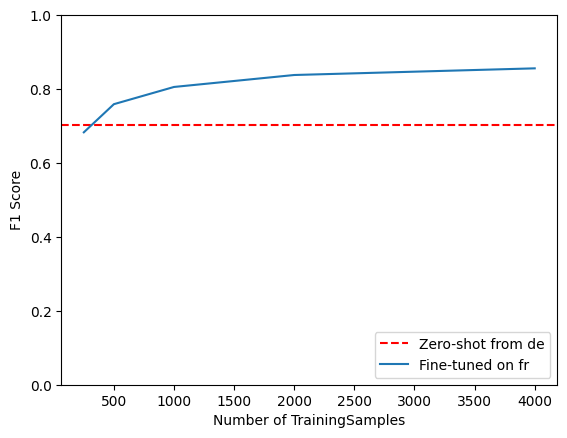

In [ ]:
import matplotlib.pyplot as plt
fig,ax  =plt.subplots()
ax.axhline(f1_scores['de']["fr"],ls="--",color="r")
metrics_df.set_index("num_samples").plot(ax=ax)
plt.ylim((0,1))
plt.legend(["Zero-shot from de","Fine-tuned on fr"],loc ="lower right")
plt.xlabel("Number of TrainingSamples")
plt.ylabel("F1 Score")
plt.show()

그래프를 보면 훈련샘플이 약 750개 일때까지 제로샷 전이가 앞선다.그 후에는 프랑스어 미세튜닝이 독일어에서 미세튜닝한 때와 비슷한 수준으로 성능이 향상됨
하지만 제로샷 전이를 무시하면 안된다. 도메인 전문가를 고용해서 수백개의 문서를 레이블링하는 비용이 만만치 않음

다중언어 학습을 평가하는 마지막 방법은 다국어에서 동시에 미세튜닝하는것임


# 다국어에서 동시에 미세튜닝
독일어에서 프랑스어나 이탈리아어로 수행된 제로샷 교차 언어 전이에서 성능이 약 15% 떨어짐. 성능 감소의 폭을 줄이는 방법 하나는 다국어에서 동시에 미세튜닝하는것임.

즉, 독일어(de)와 프랑스어(fr) 데이터를 합쳐서 한 번에 모델을 학습시키는 코드임.
그렇게 하면 언어 간 지식을 공유해서 성능 저하(약 15%)를 줄이는 효과를 얻을 수 있습니다.

In [ ]:
from datasets import concatenate_datasets

def concatenate_splits(corpora):#여러 언어 데이터셋을 리스트로 받음 ex) [panx_de_econded,panx_fr_encoded]
    multi_corpus = DatasetDict()#train,validationg,test 같은 split들을 담을 빈 딕셔너리 생성
    for split in corpora[0].keys():#각 데이터셋에 있는 키를 가져옴
      multi_corpus[split] = concatenate_datasets([corpus[split] for corpus in corpora]).shuffle(seed=42)#언어별로 같은 split끼리 묶음(독일어 train + 프랑스어 train)
                                                                                                        #왜 샘플 섞는데 seed=42로 고정할까 --> 병합된 데이터셋은 기본적으로 [모두 독일어 문장] => [모두 프랑스어 문장]
                                                                                                        #이 상태로 학습하면 모델이 언어별 패턴에 bias가 생김
                                                                                                        #앞부분은 독일어만 있으니 이건 독일어 구조겠지?
                                                                                                        #그래서 suffle로 섞어서 독일어 1개,프랑스2개,독일어2개,프랑스3개 식으로 언어가 섞이게 만들어서 bias를 줄임
                                                                                                        #seed를 고정안하면 돌릴때마다 suffle이 작동하여 결과값이 달리진다
    return multi_corpus

panx_de_fr_encoded = concatenate_splits([panx_de_encoded,panx_fr_encoded])#독일어와 프랑스어 데이터를 병합

In [ ]:
training_args.logging_steps = len(panx_de_encoded["train"])//batch_size#학습 도중에 로그(손실값,학습률 등) 몇 step 마다 출력할지 설정
                                                                       #훈련 데이터셋에 들어있는 전체 샘플수의 길이를 batch_size만큼 나눔(16) --> 5000//16 => 312 312마다 로그 출력
training_args.push_to_hub = True
training_args.ouput_dir ="xlm-roberta-base-fintuned-panx-de-fr"#학습된 모델이 저장될 폴더 이름을 지정

trainer =Trainer(model_init = model_init,args =training_args,data_collator =  data_collator,compute_metrics =compute_metrics,tokenizer= xlmr_tokenizer,train_dataset =panx_de_fr_encoded["train"],eval_dataset
                 =panx_de_fr_encoded["validation"])
trainer.train()
trainer.push_to_hub(commit_message="Training completed!")



/tmp/ipython-input-999226767.py:5: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer =Trainer(model_init = model_init,args =training_args,data_collator =  data_collator,compute_metrics =compute_metrics,tokenizer= xlmr_tokenizer,train_dataset =panx_de_fr_encoded["train"],eval_dataset


Epoch,Training Loss,Validation Loss,F1
1,0.305100,0.194991,0.806558
2,0.180900,0.177352,0.836167
3,0.106200,0.169877,0.856254
4,0.073200,0.197323,0.863482
5,0.054100,0.205107,0.871190


Processing Files (0 / 0)      : |          |  0.00B /  0.00B            

New Data Upload               : |          |  0.00B /  0.00B            

  ...panx-de/training_args.bin: 100%|##########| 5.91kB / 5.91kB            

  ...e/sentencepiece.bpe.model: 100%|##########| 5.07MB / 5.07MB            

  ...ed-panx-de/tokenizer.json:  98%|#########7| 16.7MB / 17.1MB            

  ...panx-de/model.safetensors:   2%|1         | 16.8MB / 1.11GB            

CommitInfo(commit_url='https://huggingface.co/cuteddong/xlm-roberta-base-finetuned-panx-de/commit/a8a64365c07eeb87713725596df0057f46f0acab', commit_message='Training completed!', commit_description='', oid='a8a64365c07eeb87713725596df0057f46f0acab', pr_url=None, repo_url=RepoUrl('https://huggingface.co/cuteddong/xlm-roberta-base-finetuned-panx-de', endpoint='https://huggingface.co', repo_type='model', repo_id='cuteddong/xlm-roberta-base-finetuned-panx-de'), pr_revision=None, pr_num=None)

In [ ]:
for lang in langs:
  f1 = evaluate_lang_performance(lang,trainer)
  print(f"{lang} 데이터셋에서 [de-fr]모델의 f1점수 : {f1:.3f}")

Map:   0%|          | 0/12580 [00:00<?, ? examples/s]

Map:   0%|          | 0/6290 [00:00<?, ? examples/s]

Map:   0%|          | 0/6290 [00:00<?, ? examples/s]

de 데이터셋에서 [de-fr]모델의 f1점수 : 0.876


fr 데이터셋에서 [de-fr]모델의 f1점수 : 0.865


it 데이터셋에서 [de-fr]모델의 f1점수 : 0.784


en 데이터셋에서 [de-fr]모델의 f1점수 : 0.661


# full-fine-tuning

프랑스어 테스트 세트 성능이 이전보다 훨씬 좋아져 독일어 테스트 성능과 비슷함
흥미롭게도 이탈리어와 영어 성능도 약 10퍼센트 포인트 향상됬습니다
따라서 다른 언어의 훈련 데이터를 추가해도, 본적 없는 언어에서 모델의 성능이 향상된다. 각 언어에서 미세튜닝한 성능과 전체 말뭉치에서 수행한 다중 언어 학습을 비교하면서 분석을 마무리

다국어 순차 미세튜닝 준비단계
먼저 독일어로 학습된 모델을 기준으로,나머지 언어들(fr,en,it 등)에 대해 하나씩 미세튜닝 하고 그 결과를 저장한뒤,모든 언어 데이터셋을 corpora 리스트에 모음

In [ ]:
corpora = [panx_de_encoded]#corpor는 여러 데이터셋을 담는 리스트임 처음엔 독일어만 들어있음

#반복해서 독일어는 제외
for lang in langs[1:]:#langs = ["de", "fr", "it", "en"]
  training_args.output_dir= f"xlm-roberta-base-finetuned-panx-{lang}"
  #단일 언어 말뭉치에서 미세튜닝합니다.
  ds_encoded = encode_panx_dataset(panx_ch[lang])
  metrics = train_on_subset(ds_encoded,ds_encoded["train"].num_rows)#주어진 데이터셋을 이용해 미세튜닝을 수행하고 성능지표을 반환
  #딕셔너리에 f1점수를 모은다
  f1_scores[lang][lang] = metrics["f1_score"][0]
  #단일 언어 말뭉치를 corpora리스트에 추가
  corpora.append(ds_encoded)

/tmp/ipython-input-597902387.py:8: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer= Trainer(model_init =model_init,args =training_args,data_collator=data_collator,compute_metrics = compute_metrics,train_dataset = train_ds,eval_dataset=valid_ds,tokenizer = xlmr_tokenizer)


Epoch,Training Loss,Validation Loss,F1
1,0.529100,0.300729,0.811565
2,0.274600,0.287312,0.816436
3,0.186700,0.309546,0.835020
4,0.133200,0.308044,0.837993
5,0.084300,0.321794,0.854107


Processing Files (0 / 0)      : |          |  0.00B /  0.00B            

New Data Upload               : |          |  0.00B /  0.00B            

  ...panx-fr/training_args.bin: 100%|##########| 5.91kB / 5.91kB            

  ...r/sentencepiece.bpe.model: 100%|##########| 5.07MB / 5.07MB            

  ...ed-panx-fr/tokenizer.json:  98%|#########7| 16.7MB / 17.1MB            

  ...panx-fr/model.safetensors:   2%|1         | 16.7MB / 1.11GB            

/tmp/ipython-input-597902387.py:8: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer= Trainer(model_init =model_init,args =training_args,data_collator=data_collator,compute_metrics = compute_metrics,train_dataset = train_ds,eval_dataset=valid_ds,tokenizer = xlmr_tokenizer)


Epoch,Training Loss,Validation Loss,F1
1,0.636900,0.336875,0.736800
2,0.271600,0.305935,0.778182
3,0.165300,0.228827,0.829752
4,0.106300,0.269248,0.841413
5,0.062000,0.281516,0.847835


Processing Files (0 / 0)      : |          |  0.00B /  0.00B            

New Data Upload               : |          |  0.00B /  0.00B            

  ...panx-it/training_args.bin: 100%|##########| 5.91kB / 5.91kB            

  ...t/sentencepiece.bpe.model: 100%|##########| 5.07MB / 5.07MB            

  ...ed-panx-it/tokenizer.json:  98%|#########7| 16.7MB / 17.1MB            

  ...panx-it/model.safetensors:   2%|1         | 16.8MB / 1.11GB            

/tmp/ipython-input-597902387.py:8: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer= Trainer(model_init =model_init,args =training_args,data_collator=data_collator,compute_metrics = compute_metrics,train_dataset = train_ds,eval_dataset=valid_ds,tokenizer = xlmr_tokenizer)


Epoch,Training Loss,Validation Loss,F1
1,0.972200,0.481412,0.601300
2,0.464200,0.461014,0.622590
3,0.336300,0.401117,0.683530
4,0.252100,0.428503,0.694690
5,0.185400,0.433913,0.709605


Processing Files (0 / 0)      : |          |  0.00B /  0.00B            

New Data Upload               : |          |  0.00B /  0.00B            

  ...panx-en/training_args.bin: 100%|##########| 5.91kB / 5.91kB            

  ...n/sentencepiece.bpe.model: 100%|##########| 5.07MB / 5.07MB            

  ...panx-en/model.safetensors:   2%|1         | 16.8MB / 1.11GB            

  ...ed-panx-en/tokenizer.json:  98%|#########7| 16.7MB / 17.1MB            

각 언어의 말뭉치에서 미세 튜닝했으니,다음으로 모든 언어의 분할을 합쳐서 네 언어로 구성된 다국어 말뭉치를 만듬 이를 위해 앞의 독일어와 프랑스어를 합칠때처럼,concatenate_splits()함수에 위에서 생성한 말뭉치 리스트를 적용

In [ ]:
corpora_encoded = concatenate_splits(corpora)#여러 언어 데이터셋을 하나로 병합하는 코드

In [ ]:
#Trainer 실행
training_args.logging_steps = len(corpora_encoded["train"]) //batch_size


trainer= Trainer(model_init =model_init,args =training_args,data_collator=data_collator,compute_metrics = compute_metrics,tokenizer= xlmr_tokenizer,train_dataset =corpora_encoded["train"],eval_dataset=corpora_encoded["validation"])
trainer.train()
trainer.push_to_hub(commit_message ="Training completed!")


/tmp/ipython-input-3703613155.py:5: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer= Trainer(model_init =model_init,args =training_args,data_collator=data_collator,compute_metrics = compute_metrics,tokenizer= xlmr_tokenizer,train_dataset =corpora_encoded["train"],eval_dataset=corpora_encoded["validation"])


Epoch,Training Loss,Validation Loss,F1
1,0.295800,0.204950,0.802870
2,0.165400,0.181734,0.840973
3,0.115600,0.180735,0.852775
4,0.076900,0.211396,0.856315
5,0.048400,0.229395,0.860203


Processing Files (0 / 0)      : |          |  0.00B /  0.00B            

New Data Upload               : |          |  0.00B /  0.00B            

  ...panx-en/training_args.bin: 100%|##########| 5.91kB / 5.91kB            

  ...n/sentencepiece.bpe.model: 100%|##########| 5.07MB / 5.07MB            

  ...panx-en/model.safetensors:   1%|          | 8.37MB / 1.11GB            

  ...ed-panx-en/tokenizer.json:  49%|####9     | 8.39MB / 17.1MB            

CommitInfo(commit_url='https://huggingface.co/cuteddong/xlm-roberta-base-finetuned-panx-en/commit/a49d0e3b8dd5eba05ecd9a62d5e8dd397bfed088', commit_message='Training completed!', commit_description='', oid='a49d0e3b8dd5eba05ecd9a62d5e8dd397bfed088', pr_url=None, repo_url=RepoUrl('https://huggingface.co/cuteddong/xlm-roberta-base-finetuned-panx-en', endpoint='https://huggingface.co', repo_type='model', repo_id='cuteddong/xlm-roberta-base-finetuned-panx-en'), pr_revision=None, pr_num=None)

마지막 단계로 trainer를 사용해 각 언어의 테스트 세트에 대한 예측을 생성
이 과정에서 다중 언어 전이 학습이 실제로 얼마나 잘 작동하는지 통찰을 얻음
f1_scores 딕셔너리 f1 점수를 저장하고 다중 언어 실험의 주요 결과를 요약한 DataFrame을 만듬

In [ ]:
for idx , lang in enumerate(langs):
  f1_scores["all"][lang]  = get_f1_score(trainer,corpora[idx]["test"])

scores_data = {"de" :f1_scores["de"],"each " : {lang : f1_scores[lang][lang] for lang in langs}, "all" : f1_scores["all"]}

f1_scores_df = pd.DataFrame(scores_data).T.round(4)
f1_scores_df.rename_axis(index = "Fine-tune on",columns = "Evaluated on",inplace = True)

f1_scores_df

Evaluated on,de,fr,it,en
Fine-tune on,,,,
de,0.8752,0.7040,0.6945,0.6063
each,0.8752,0.8655,0.8380,0.7185
all,0.8754,0.8649,0.8688,0.7832
